<font size="5"><b>Case Study I</b><br><br>
Module 10: Unsupervised Learning
 </font>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import svm
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import classification_report
#from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline
from sklearn import datasets, svm, metrics
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,9)

In [28]:
data = pd.read_csv('driver-data.csv')

In [29]:
data.head(4)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22


In [30]:
newdata=data.iloc[:,1:3]

In [31]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [55]:
kmeans_model = KMeans(n_clusters=6)

In [56]:
kmeans_model.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
kmeans_model.cluster_centers_

array([[ 5.78345241e+01,  5.28620690e+00, -2.17603713e-14],
       [ 1.96832530e+02,  1.12103659e+01,  1.02439024e+00],
       [ 4.14957981e+01,  5.39198218e+00,  2.00000000e+00],
       [ 1.76636768e+02,  7.15353535e+01,  3.00000000e+00],
       [ 5.06142184e+01,  3.30620347e+01,  4.00000000e+00],
       [ 1.66127480e+02,  1.03833780e+01,  1.00268097e+00]])

In [58]:
kmeans_model.algorithm

'auto'

In [59]:
kmeans_model.inertia_

372844.50880048936

In [60]:
kmeans_model.labels_

array([4, 4, 4, ..., 5, 5, 5])

In [61]:
print(len(kmeans_model.labels_))

4000


In [62]:
unique,counts = np.unique(kmeans_model.labels_,return_counts=True)

In [63]:
counts

array([1450,  328, 1347,   99,  403,  373], dtype=int64)

In [64]:
unique

array([0, 1, 2, 3, 4, 5])

In [65]:
print(dict(zip(unique,counts)))

{0: 1450, 1: 328, 2: 1347, 3: 99, 4: 403, 5: 373}


In [66]:
newdata['Cluser']=kmeans_model.labels_

In [67]:
newdata.head(3)

,mean_dist_day,mean_over_speed_perc,Cluser
0,71.24,28,4
1,52.53,25,4
2,64.54,27,4


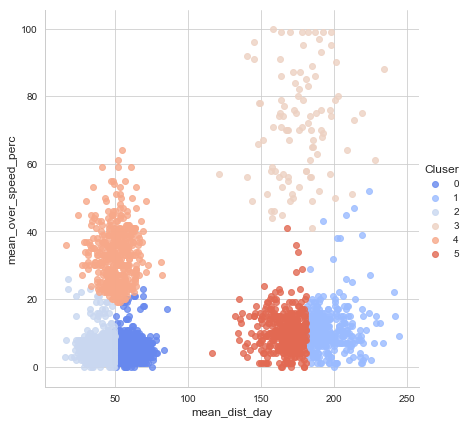

In [68]:
sn.set_style('whitegrid')
sn.lmplot('mean_dist_day','mean_over_speed_perc',data=newdata,hue='Cluser',palette='coolwarm',size=6,aspect=1,fit_reg=False)